# Pseudo Labeling

## fusion model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
# from tqdm import tqdm
# import shutil
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))

from backend.utils.models.fusion_data import grouping_data, predict_by_model_fusion
from backend.utils.comparing import plot_confusion_matrix
MODEL_PATH = os.path.join(PATH, 'backend/models')
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
round_num = 3

2025-08-04 20:16:28.072718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Test With Groundtruth

In [ ]:
feature, ground_df, label_cols = grouping_data(LABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH20
invalid instruction: PUSH18
invalid instruction: PUSH28
invalid instruction: PUSH32
invalid instruction: PUSH31
invalid instruction: PUSH30
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH31
invalid instruction: PUSH25
invalid instruction: PUSH14
invalid instruction: PUSH32
invalid instruction: PUSH30
invalid instruction: PUSH25
invalid instruction: PUSH30
invalid instruction: PUSH15
invalid instruction: PUSH22
invalid instruction: PUSH20
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH26
invalid instruction: PUSH16
invalid instruction: PUSH23
invalid instruction: PUSH8
invalid instruction: PUSH17
invalid instruction: PUSH14
invalid instruction: PUSH15
invalid instruction: PUSH5
invalid instruction: PUSH7
invalid instruction: PUSH10
invalid instruction: PUSH27
invalid instruction: PU

Skipping 0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad: invalid literal for int() with base 10: ''


Extracting timeline features:  17%|█▋        | 43/246 [00:00<00:01, 116.70it/s]

Skipping 0x740e6b6f0a0165e8bb3d1cdf94862bdffbded22e: invalid literal for int() with base 10: ''


Extracting timeline features:  26%|██▋       | 65/246 [00:00<00:02, 86.89it/s] 

Skipping 0x36b14bae0989f65f80892b99a55378d3e1a80c81: invalid literal for int() with base 10: ''
Skipping 0x7fc408011165760ee31be2bf20daf450356692af: invalid literal for int() with base 10: ''
Skipping 0xdd007278b667f6bef52fd0a4c23604aa1f96039a: invalid literal for int() with base 10: ''


Extracting timeline features:  41%|████▏     | 102/246 [00:01<00:01, 106.68it/s]

Skipping 0x4e7a34c6c29a4741858a7ec5622cd8be21b0351b: invalid literal for int() with base 10: ''
Skipping 0xc310755f88145cabcaa06c714cd668b5465dceaa: invalid literal for int() with base 10: ''


Extracting timeline features:  71%|███████   | 174/246 [00:02<00:00, 78.93it/s] 

Skipping 0xff1560afef58be59b11c72734ad1d89db63e4e71: invalid literal for int() with base 10: ''
Skipping 0xf1afddbed214dba82cb98d46ad0a96e643f7f6f6: invalid literal for int() with base 10: ''


Extracting timeline features:  89%|████████▉ | 220/246 [00:02<00:00, 91.72it/s] 

Skipping 0xb9aac097f4dadcd6f06761eb470346415ef28d5a: invalid literal for int() with base 10: ''
Skipping 0x56ba2ee7890461f463f7be02aac3099f6d5811a8: invalid literal for int() with base 10: ''
Skipping 0x2f22c502a8029d5e64aeafb6e0a214c0323f43c7: invalid literal for int() with base 10: ''
Skipping 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb: invalid literal for int() with base 10: ''


Extracting timeline features:  98%|█████████▊| 242/246 [00:02<00:00, 79.85it/s]

Skipping 0x514bc174df04a4b04ae2be81ee8c788c3796b06b: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 246/246 [00:02<00:00, 83.41it/s]


In [ ]:
list(feature.items())[0]

('0x93023f1d3525e273f291b6f76d2f5027a39bf302',
 {'byte': opcode_entropy                       0.0
  byte_entropy                         0.0
  byte_0x                              1.0
  byte_60                              0.0
  byte_80                              0.0
                                      ... 
  dup5 gas delegatecall                0.0
  delegatecall returndatasize push1    0.0
  jumpdest returndatasize push1        0.0
  returndatasize push1 return          0.0
  iszero eq push2                      0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 8144, dtype: float64,
  'txn': txn_nums              0.0
  event_nums            0.0
  creation_block        0.0
  creation_timestamp    0.0
  start_block           0.0
                       ... 
  slashstake_num        0.0
  banauditor_num        0.0
  owner_num             0.0
  setdth_num            0.0
  init_num              0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 370, dtype: flo

              precision    recall  f1-score   support

        Mint       0.52      0.50      0.51       123
        Leak       0.45      0.47      0.46       133
       Limit       0.23      0.14      0.18        77

   micro avg       0.44      0.41      0.42       333
   macro avg       0.40      0.37      0.38       333
weighted avg       0.43      0.41      0.41       333
 samples avg       0.36      0.33      0.31       333



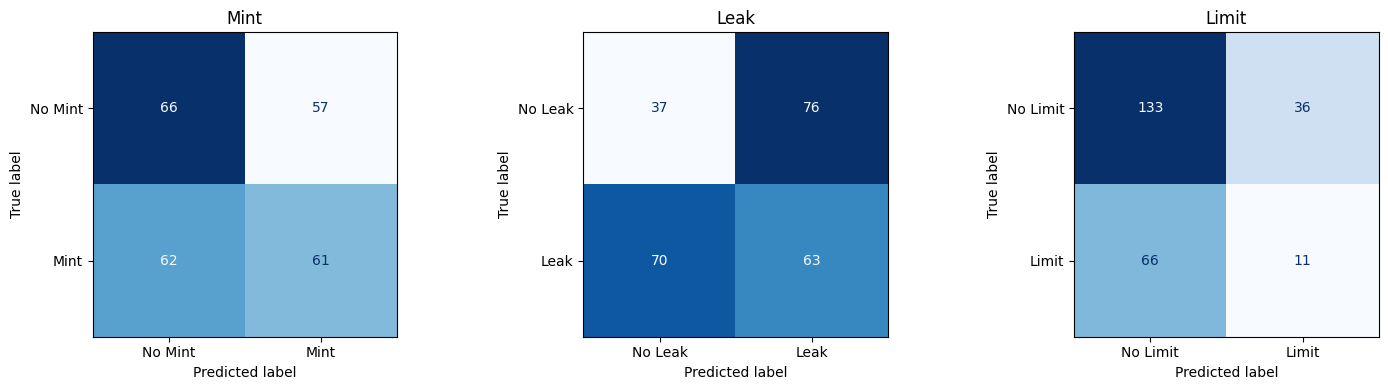

In [ ]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols)
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)

============== Threshold: 0.0 ==============
              precision    recall  f1-score   support

        Mint       0.50      1.00      0.67       123
        Leak       0.54      0.99      0.70       133
       Limit       0.31      1.00      0.48        77

   micro avg       0.45      1.00      0.62       333
   macro avg       0.45      1.00      0.61       333
weighted avg       0.47      1.00      0.64       333
 samples avg       0.45      0.82      0.56       333



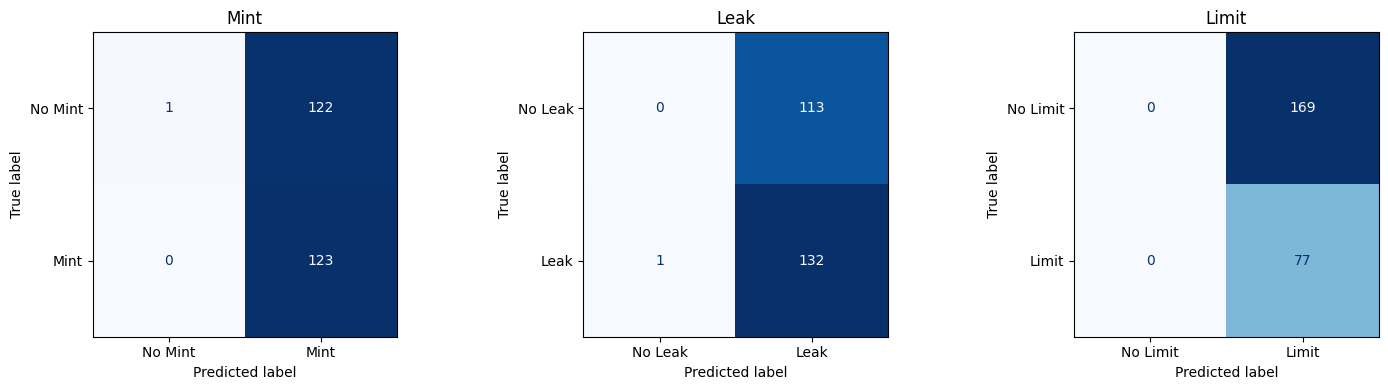

============== Threshold: 0.1 ==============
              precision    recall  f1-score   support

        Mint       0.50      1.00      0.67       123
        Leak       0.54      0.99      0.70       133
       Limit       0.31      1.00      0.48        77

   micro avg       0.45      1.00      0.62       333
   macro avg       0.45      1.00      0.61       333
weighted avg       0.47      1.00      0.64       333
 samples avg       0.45      0.82      0.56       333



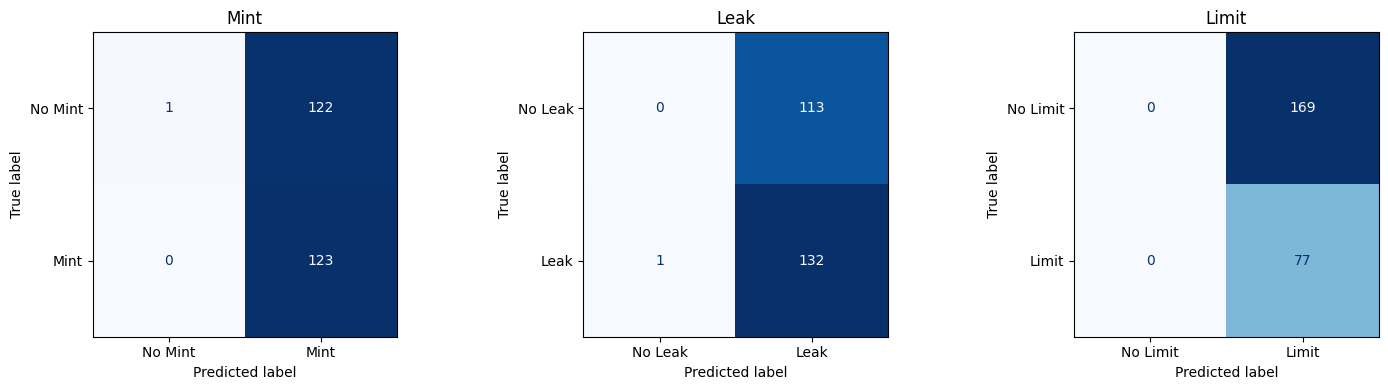

============== Threshold: 0.2 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.98      0.66       123
        Leak       0.53      0.98      0.69       133
       Limit       0.31      0.92      0.47        77

   micro avg       0.45      0.97      0.62       333
   macro avg       0.45      0.96      0.61       333
weighted avg       0.47      0.97      0.63       333
 samples avg       0.46      0.79      0.55       333



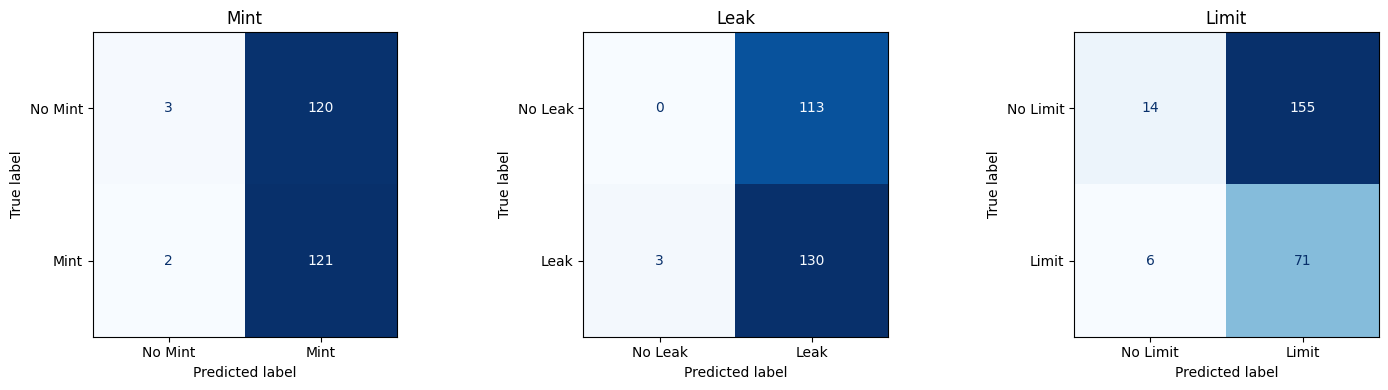

============== Threshold: 0.30000000000000004 ==============
              precision    recall  f1-score   support

        Mint       0.51      0.97      0.66       123
        Leak       0.53      0.95      0.68       133
       Limit       0.31      0.74      0.44        77

   micro avg       0.46      0.91      0.61       333
   macro avg       0.45      0.89      0.59       333
weighted avg       0.47      0.91      0.62       333
 samples avg       0.47      0.75      0.55       333



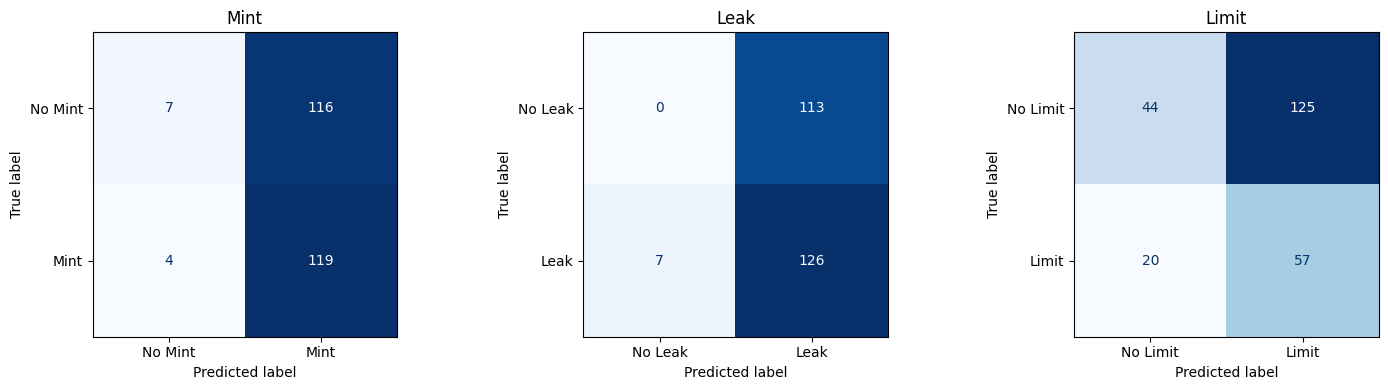

============== Threshold: 0.4 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.82      0.62       123
        Leak       0.50      0.77      0.61       133
       Limit       0.29      0.51      0.37        77

   micro avg       0.45      0.73      0.55       333
   macro avg       0.43      0.70      0.53       333
weighted avg       0.45      0.73      0.56       333
 samples avg       0.46      0.61      0.48       333



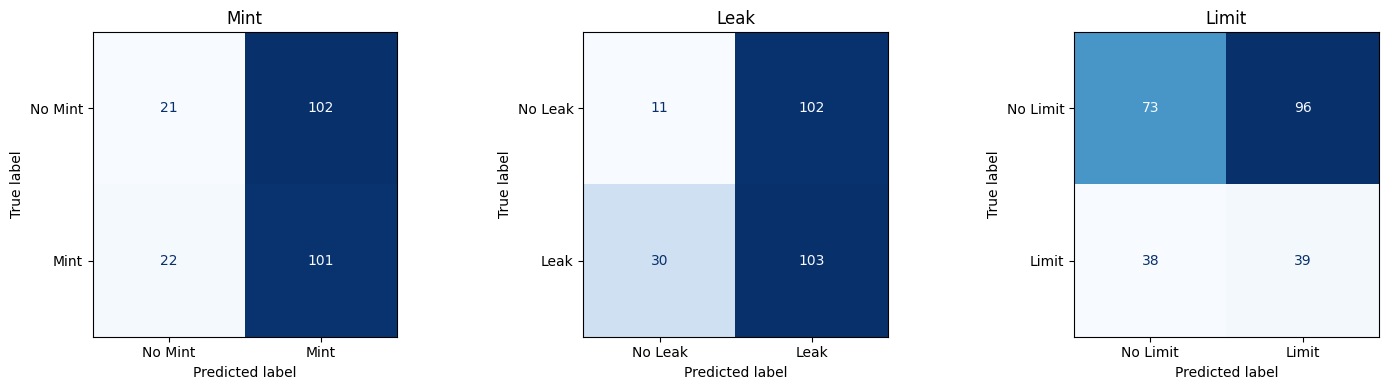

============== Threshold: 0.5 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.80      0.62       123
        Leak       0.49      0.71      0.58       133
       Limit       0.26      0.35      0.30        77

   micro avg       0.44      0.66      0.53       333
   macro avg       0.41      0.62      0.50       333
weighted avg       0.44      0.66      0.53       333
 samples avg       0.44      0.55      0.45       333



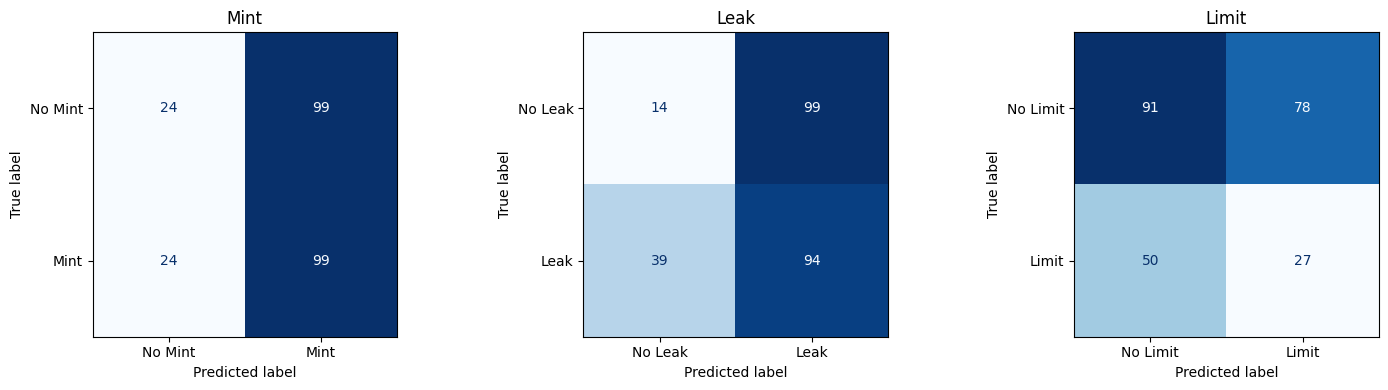

============== Threshold: 0.6000000000000001 ==============
              precision    recall  f1-score   support

        Mint       0.52      0.50      0.51       123
        Leak       0.45      0.47      0.46       133
       Limit       0.23      0.14      0.18        77

   micro avg       0.44      0.41      0.42       333
   macro avg       0.40      0.37      0.38       333
weighted avg       0.43      0.41      0.41       333
 samples avg       0.36      0.33      0.31       333



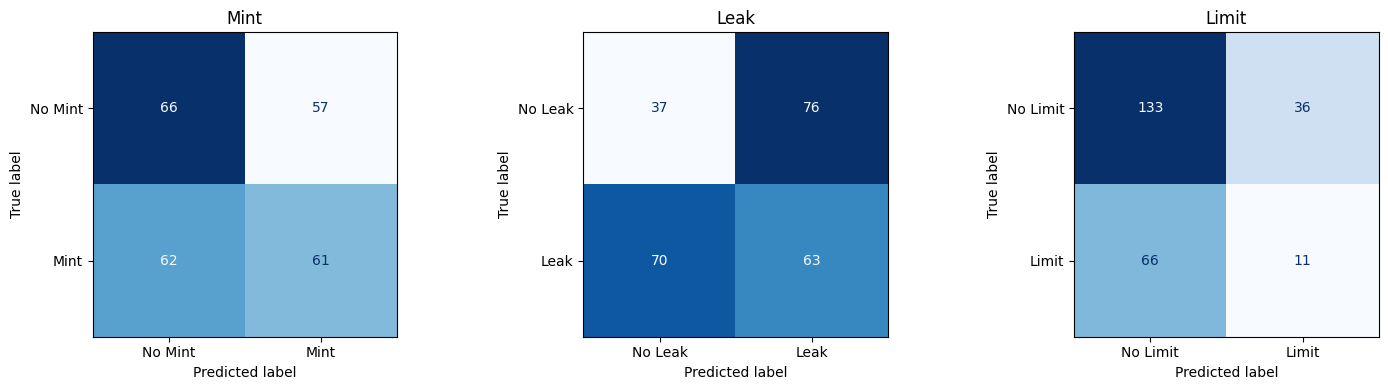

============== Threshold: 0.7000000000000001 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.34      0.41       123
        Leak       0.40      0.29      0.33       133
       Limit       0.19      0.06      0.10        77

   micro avg       0.42      0.26      0.32       333
   macro avg       0.37      0.23      0.28       333
weighted avg       0.39      0.26      0.31       333
 samples avg       0.27      0.22      0.22       333



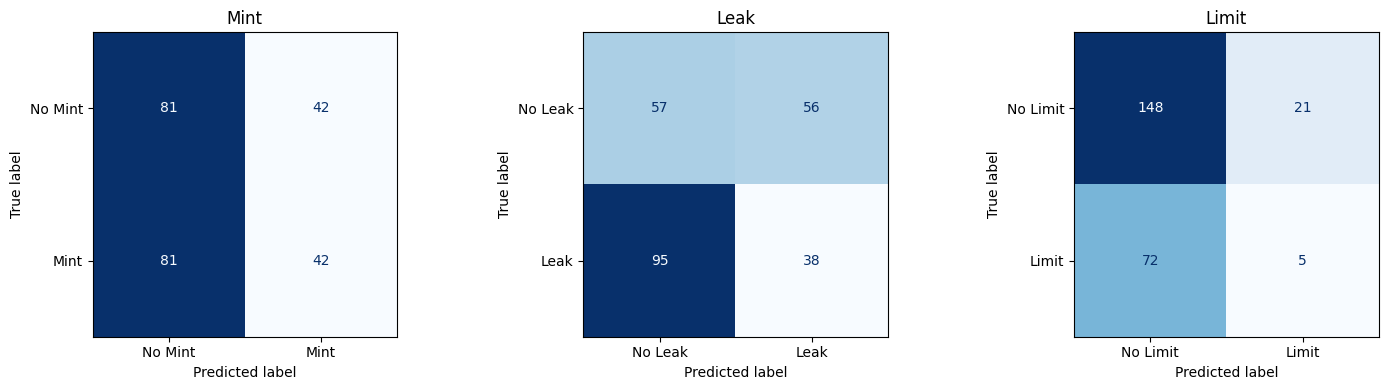

============== Threshold: 0.8 ==============
              precision    recall  f1-score   support

        Mint       0.55      0.18      0.27       123
        Leak       0.39      0.18      0.25       133
       Limit       0.19      0.04      0.06        77

   micro avg       0.42      0.15      0.22       333
   macro avg       0.38      0.13      0.19       333
weighted avg       0.40      0.15      0.21       333
 samples avg       0.16      0.12      0.13       333



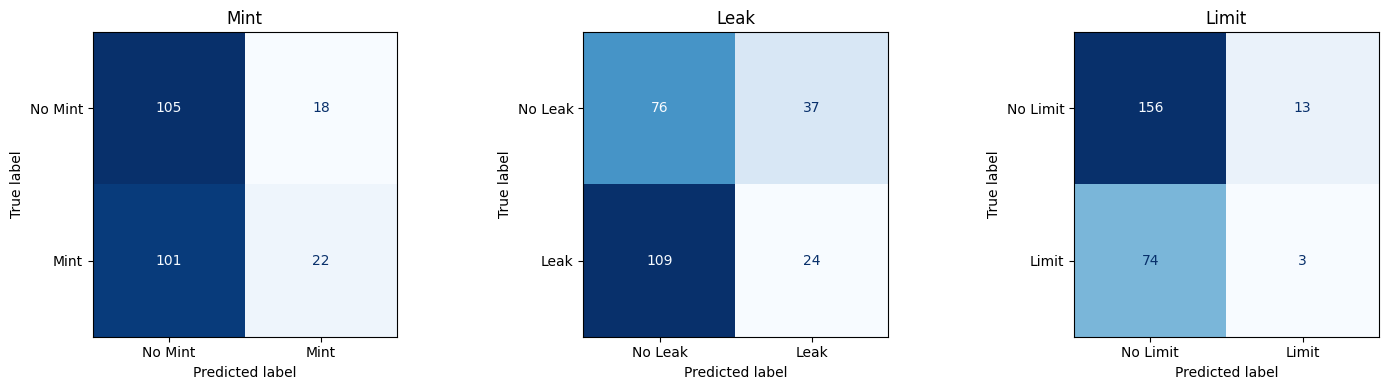

============== Threshold: 0.9 ==============
              precision    recall  f1-score   support

        Mint       0.64      0.15      0.24       123
        Leak       0.58      0.05      0.10       133
       Limit       0.25      0.01      0.02        77

   micro avg       0.59      0.08      0.14       333
   macro avg       0.49      0.07      0.12       333
weighted avg       0.53      0.08      0.13       333
 samples avg       0.10      0.07      0.08       333



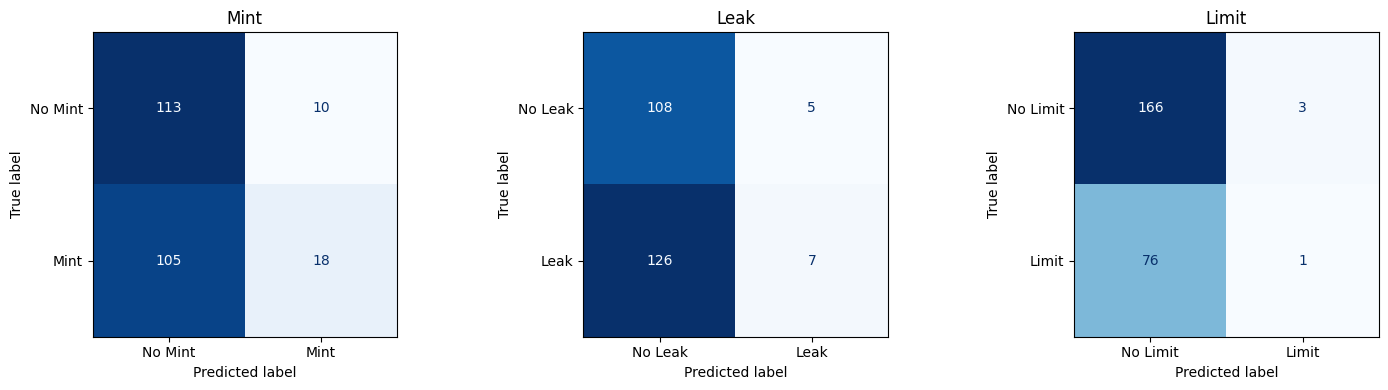

In [ ]:
for threshold in np.arange(0, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)


## Test With Unlabelled

In [3]:
feature, ground_df, label_cols = grouping_data(UNLABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH22
invalid instruction: PUSH17
invalid instruction: PUSH21
invalid instruction: PUSH17
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH11
invalid instruction: PUSH23
invalid instruction: PUSH29
invalid instruction: PUSH13
invalid instruction: PUSH21
invalid instruction: PUSH22
invalid instruction: PUSH30
invalid instruction: PUSH32
invalid instruction: PUSH16
invalid instruction: PUSH18
invalid instruction: PUSH32
invalid instruction: PUSH31
invalid instruction: PUSH29
invalid instruction: PUSH4
invalid instruction: PUSH32
invalid instruction: PUSH15
invalid instruction: PUSH28
invalid instruction: PUSH26
invalid instruction: PUSH31
invalid instruction: PUSH15
invalid instruction: PUSH16
invalid instruction: PUSH27
invalid instruction: PUSH28
invalid instruction: PUSH13
invalid instruction: PUSH26
invalid instruction: PUSH21
invalid instruction: PUSH30
invalid instruction: PUSH28
invalid instruction: PUSH8
invalid instruction: P

Processing 0xff603f43946a3a28df5e6a73172555d8c8b02386.hex for address 0xff603f43946a3a28df5e6a73172555d8c8b02386
Processing 0x9954ff0295443c01f562dccb1f893be464e01986.hex for address 0x9954ff0295443c01f562dccb1f893be464e01986
Processing 0x27054b13b1b798b345b591a4d22e6562d47ea75a.hex for address 0x27054b13b1b798b345b591a4d22e6562d47ea75a
Processing 0xdd72a22b2229fcf2a93fe0ec1328244d76d6afc9.hex for address 0xdd72a22b2229fcf2a93fe0ec1328244d76d6afc9
Processing 0xd29decbfd29766d8aba8215587f915162c5bd8d8.hex for address 0xd29decbfd29766d8aba8215587f915162c5bd8d8
Processing 0xafaefa2a7c7aab9f8b047268500035514487ef0a.hex for address 0xafaefa2a7c7aab9f8b047268500035514487ef0a
Processing 0xea38eaa3c86c8f9b751533ba2e562deb9acded40.hex for address 0xea38eaa3c86c8f9b751533ba2e562deb9acded40
Processing 0xbae94d28610c8cfd2168f7b97bc7cb0589803c6b.hex for address 0xbae94d28610c8cfd2168f7b97bc7cb0589803c6b
Processing 0xd7394087e1dbbe477fe4f1cf373b9ac9459565ff.hex for address 0xd7394087e1dbbe477fe4f1cf

Extracting timeline features:  31%|███       | 31/100 [00:00<00:00, 152.85it/s]

Skipping 0xc0ffee0505d21342cd503bc57ed33fc2cec7f225: invalid literal for int() with base 10: ''
Skipping 0x669dcf45bddfe4f8f5a15984461e4fab939af1f8: invalid literal for int() with base 10: ''
Skipping 0xbd1e1ea13de6f320e89f33a7076b29d1a00506d8: invalid literal for int() with base 10: ''
Skipping 0xc1466074bc6daa0c388be07d35152a822230c3f5: invalid literal for int() with base 10: ''
Skipping 0x3199edb8b8b0be14e3b79e0a6674cf12e7ca840b: invalid literal for int() with base 10: ''


Extracting timeline features:  62%|██████▏   | 62/100 [00:00<00:00, 100.17it/s]

Skipping 0xaf6d36e6a376cda44a5ce9280507e5e24132c143: invalid literal for int() with base 10: ''
Skipping 0x6a8d7d37870cfc7abf7a316412bab5ed9c3aba34: invalid literal for int() with base 10: ''
Skipping 0x9f6b043aebf45c3bef56900ed96cb5191a68998d: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 100/100 [00:01<00:00, 99.60it/s]


Skipping 0x220a64b2bac78f0e59620827dfa44e12e72a8178: invalid literal for int() with base 10: ''
Skipping 0x4c0ff1b2c1ef5e2b3dd2c74023cbf7ae36f01391: invalid literal for int() with base 10: ''


In [4]:
# for threshold in np.arange(0.0, 1, 0.1):
#     print(f"============== Threshold: {threshold} ==============")
#     preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
#     preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
#     merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
#     target = 'Limit'
#     y_true, y_pred = merged_df[target], merged_df[f'pred_{target}']
#     print(classification_report(y_true, y_pred))

In [7]:
for threshold in np.arange(0.0, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    # preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    # merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    print(preds_df['Mint'].value_counts(), preds_df['Leak'].value_counts(), preds_df['Limit'].value_counts())
    # print(merged_df.value_counts())

============== Threshold: 0.0 ==============
Mint
1    99
0     1
Name: count, dtype: int64 Leak
1    100
Name: count, dtype: int64 Limit
1    100
Name: count, dtype: int64
============== Threshold: 0.1 ==============
Mint
1    99
0     1
Name: count, dtype: int64 Leak
1    100
Name: count, dtype: int64 Limit
1    100
Name: count, dtype: int64
============== Threshold: 0.2 ==============
Mint
1    95
0     5
Name: count, dtype: int64 Leak
1    97
0     3
Name: count, dtype: int64 Limit
1    94
0     6
Name: count, dtype: int64
============== Threshold: 0.30000000000000004 ==============
Mint
1    92
0     8
Name: count, dtype: int64 Leak
1    91
0     9
Name: count, dtype: int64 Limit
1    93
0     7
Name: count, dtype: int64
============== Threshold: 0.4 ==============
Mint
1    75
0    25
Name: count, dtype: int64 Leak
1    78
0    22
Name: count, dtype: int64 Limit
1    79
0    21
Name: count, dtype: int64
============== Threshold: 0.5 ==============
Mint
1    62
0    38
Name: count

In [ ]:
# merged_df = merged_df[['Address', 'pred_Mint', 'pred_Leak', 'Limit']].rename(columns={'pred_Mint': 'Mint', 'pred_Leak': 'Leak'}).set_index('Address')
# merged_df.value_counts()

Mint  Leak  Limit
0     0     1        27
      1     1        21
1     0     1        18
      1     1        12
      0     0         6
0     0     0         4
1     1     0         2
0     1     0         1
Name: count, dtype: int64

In [ ]:
# ground_df = pd.read_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index_col=0)

In [ ]:
# new_ground_df = pd.concat([ground_df, merged_df]).reset_index()
# new_ground_df = new_ground_df.drop_duplicates(subset='Address', keep='last').set_index('Address')
# new_ground_df

,Mint,Leak,Limit
Address,,,
0x93023f1d3525e273f291b6f76d2f5027a39bf302,1,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,0,0,1
0x94b7d24552933f50a5a5705c446528806dcea381,0,0,0
0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093,0,0,0
0x10f6f2b97f3ab29583d9d38babf2994df7220c21,1,0,1
...,...,...,...
0xea26c4ac16d4a5a106820bc8aee85fd0b7b2b664,0,0,1
0xeca2967b2a2cc584495b2226372bc0dde481f857,0,0,0
0x7dc4f41294697a7903c4027f6ac528c5d14cd7eb,0,0,1


In [ ]:
# ground_df.to_csv(os.path.join(DATA_PATH, f'logs/groundtruth-{round_num-1}.csv'))

In [ ]:
# new_ground_df.to_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'))

In [ ]:
# HEX_PATH = os.path.join(UNLABELED_PATH, 'hex')
# SOL_PATH = os.path.join(UNLABELED_PATH, 'sol')
# TXN_PATH = os.path.join(UNLABELED_PATH, 'txn')

# for src_file in tqdm(list(Path(HEX_PATH).glob('*.hex'))):
#     address = src_file.stem.lower()
#     shutil.move(src_file, os.path.join(LABELED_PATH, f'hex/{address}.hex'))

# for src_file in tqdm(list(Path(SOL_PATH).glob('*.sol'))):
#     address = src_file.stem.lower()
#     shutil.move(src_file, os.path.join(LABELED_PATH, f'sol/{address}.sol'))

# for src_file in tqdm(list(Path(TXN_PATH).glob('*.json'))):
#     address = src_file.stem.lower()
#     shutil.move(src_file, os.path.join(LABELED_PATH, f'txn/{address}.json'))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
